In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import json
from util import *
import tensorflow as tf
import matplotlib.pyplot as plt
import math

**Input file layer name**

In [52]:
layer = 'aixh_layer29'

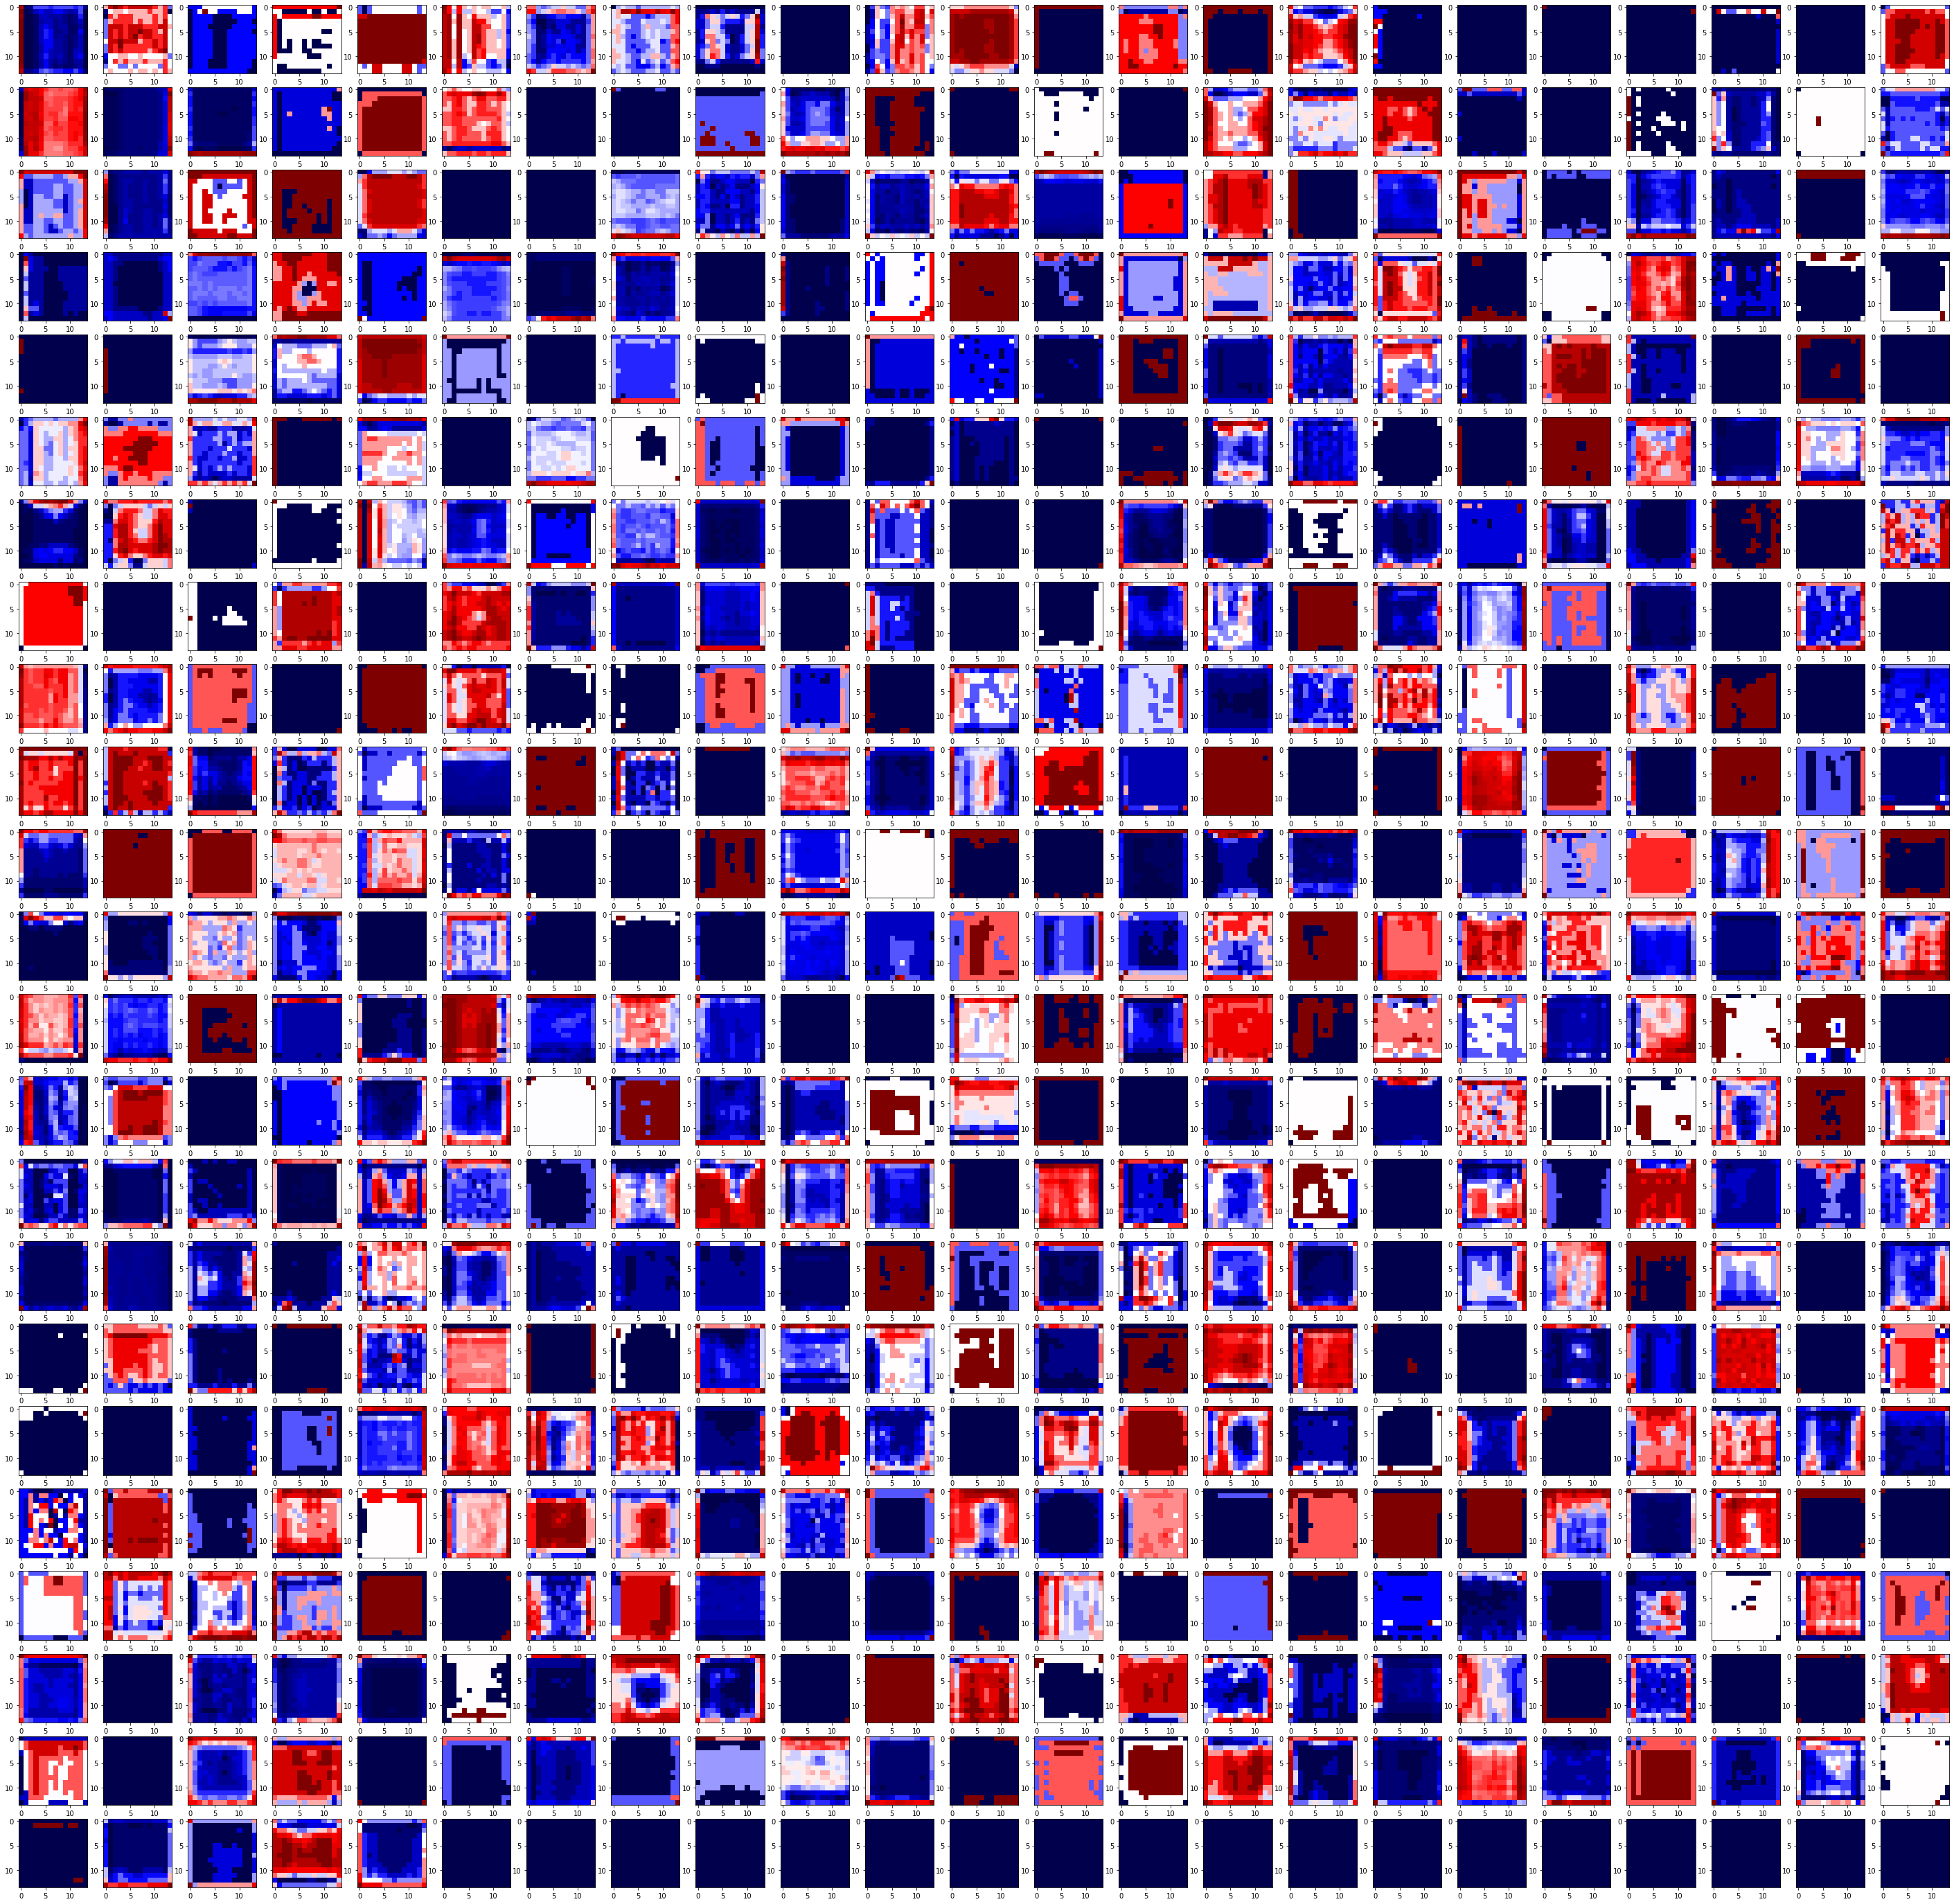

aixh_layer29


In [53]:
with open(layer, 'r') as file:
    result_json = json.load(file)

assert len(result_json['dims']) == 4

np_result = np.array(result_json['result'])
dims = result_json['dims']
reshape = np_result.reshape(1,dims[2],dims[0],dims[0])
tf_result = np.einsum('NCHW->NHWC', reshape)

num_chnls = tf_result.shape[3]
grids = math.ceil(math.sqrt(num_chnls))
fig, axes = plt.subplots(grids, grids,figsize=(50, 50))

for i, ax in enumerate(axes.flat):
    if i<num_chnls:
        im = tf_result[0,:, :,  i]
    ax.imshow(im, interpolation='nearest', cmap='seismic')
plt.show()
print(layer)